# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import numpy as np

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [2]:
# your answer here
employee = pd.read_csv('Employee.csv')

#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [3]:
# your answer here-1st way
employee.groupby(['Department'])['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [4]:
# your answer here-2nd way
employee.pivot_table(index=['Department'], values=['Salary'], aggfunc=np.mean)

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [5]:
# your answer here
employee.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc=np.mean)

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:
# your answer here
employee.pivot_table(index=['Department', 'Title'], values=['Salary', 'Years'], aggfunc=np.mean)

Salary  Years
Department Title                   
HR         VP           70.0    8.0
           analyst      32.5    3.0
IT         VP           70.0    8.0
           analyst      32.5    1.5
           associate    60.0    7.0
Sales      associate    55.0    2.5

#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [7]:
# your answer here
df = employee.pivot_table(index=['Department', 'Title'], values=['Salary', 'Name'], aggfunc={'Salary': np.mean,'Name': len})
df.columns = ['employee_count', 'salary_mean']
df.head()

employee_count  salary_mean
Department Title                                 
HR         VP                      1         70.0
           analyst                 2         32.5
IT         VP                      1         70.0
           analyst                 2         32.5
           associate               1         60.0

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [8]:
# your answer here
employee.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc=[np.median, min, max, np.std])

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [9]:
# your answer here
employee.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc=[np.median, min, max, np.std], fill_value=0)

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [10]:
# your answer here
df = employee.pivot_table(index=['Department'], values=['Salary', 'Name'], aggfunc={'Salary': np.sum,'Name': len})
df.columns = ['employee_count', 'salary_sum']
df.head()

,employee_count,salary_sum
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the total years of work experience and the mean salary

In [11]:
# your answer here
df = employee.pivot_table(index=['Department', 'Title'], values=['Salary', 'Years'], aggfunc={'Salary': np.mean,'Years': np.sum})
df.columns = ['salary_mean', 'total_years']
df.head()

salary_mean  total_years
Department Title                              
HR         VP                70.0            8
           analyst           32.5            6
IT         VP                70.0            8
           analyst           32.5            3
           associate         60.0            7

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [12]:
# your answer here--Your custom function here
def average_no_max(nums):
    variable = (sum(nums) - max(nums)) / (len(nums) - 1)
    return variable

In [13]:
# your answer here
employee.pivot_table(index=['Department'], values=['Salary'], aggfunc={'Salary': average_no_max})
# employee.pivot_table(index=['Department'], values=['Salary'], aggfunc={'Salary': lambda x: (sum(x) - max(x)) / (len(x) - 1)})

,Salary
Department,
HR,32.500000
IT,41.666667
Sales,55.000000


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [14]:
# your answer here
fitbit = pd.read_csv('Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [15]:
# your answer here
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
Date                      367 non-null object
Calorie burned            367 non-null int64
Steps                     367 non-null int64
Distance                  367 non-null float64
Floors                    367 non-null int64
Minutes Sedentary         367 non-null float64
Minutes Lightly Active    367 non-null int64
Minutes Fairly Active     367 non-null int64
Minutes Very Active       367 non-null int64
Activity Calories         367 non-null int64
MinutesOfSleep            367 non-null int64
MinutesOfBeingAwake       367 non-null int64
NumberOfAwakings          367 non-null int64
LengthOfRestInMinutes     367 non-null int64
dtypes: float64(2), int64(11), object(1)
memory usage: 40.2+ KB


In [16]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [17]:
# your answer here
corr = fitbit[['Minutes Very Active', 'Steps']].corr()
print(corr)

                     Minutes Very Active     Steps
Minutes Very Active             1.000000  0.571452
Steps                           0.571452  1.000000


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

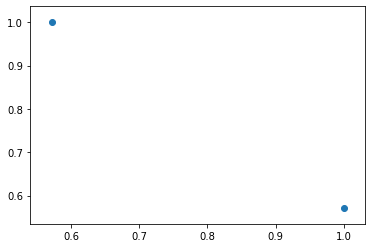

In [18]:
# your answer here
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x=corr['Minutes Very Active'], y=corr['Steps'])

#### What can you say about Minute Very Active and Steps? Write a comment below

In [19]:
# your comment here

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [20]:
# your answer here
corr = fitbit[['Minutes Sedentary', 'Steps']].corr()
print(corr)

                   Minutes Sedentary     Steps
Minutes Sedentary           1.000000  0.076906
Steps                       0.076906  1.000000


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

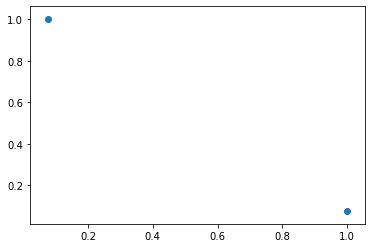

In [21]:
# your answer here
plt.scatter(x=corr['Minutes Sedentary'], y=corr['Steps'])

In [22]:
# Your comment here

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [23]:
# your answer here
corr = fitbit[['MinutesOfSleep', 'Steps']].corr()
print(corr)

                MinutesOfSleep     Steps
MinutesOfSleep        1.000000  0.130986
Steps                 0.130986  1.000000


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

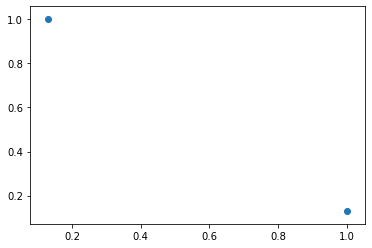

In [24]:
# your answer here
plt.scatter(x=corr['MinutesOfSleep'], y=corr['Steps'])

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [25]:
# your answer here
column = ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
cor_fit = fitbit[column].corr()

In [26]:
#Print cor_fit
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [27]:
# your answer here
cor_fit['Steps'].sort_values(ascending = False)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [28]:
# your answer here
time_grades = pd.read_csv('Time_Grades.csv')

In [29]:
#Print time_grades
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

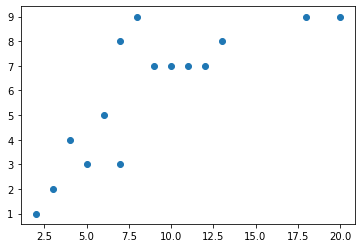

In [30]:
# your answer here
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [31]:
# your answer here-Pearson 
cor_pearson = time_grades.corr(method='pearson')
cor_pearson

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [32]:
## your answer here-Spearman
cor_spearman = time_grades.corr(method='spearman')
cor_spearman

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

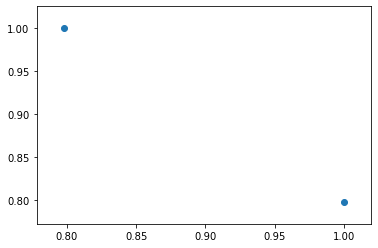

In [33]:
# your answer here
plt.scatter(x=cor_pearson['Study time'], y=cor_pearson['Grade'])

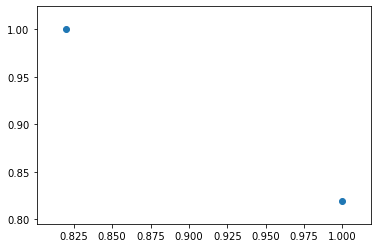

In [34]:
#your comment here
plt.scatter(x=cor_spearman['Study time'], y=cor_spearman['Grade'])

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [35]:
#your comment here
# Pearson correlation coefficient, is sensitive only to a linear relationship between two variables (which may be present even when one variable is a nonlinear function of the other).
# The Spearman correlation between two variables is equal to the Pearson correlation between the rank values of those two variables; while Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not). If there are no repeated data values, a perfect Spearman correlation of +1 or −1 occurs when each of the variables is a perfect monotone function of the other.